In [1]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

/Users/nimishawalgaonkar/anaconda2/envs/scikit_optimize_develop/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<Figure size 432x288 with 0 Axes>

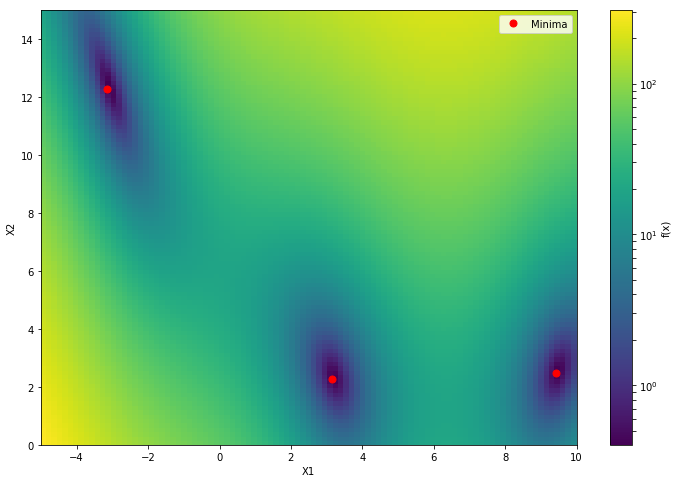

In [2]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

In [3]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

In [4]:
ntrain = 50 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

In [17]:
opt = Optimizer(dimensions = bounds, base_estimator = 'GP',
               acq_func = 'EI', acq_optimizer = 'sampling', random_state = 1)

In [20]:
opt.tell(X_train.tolist(), Y_train.tolist())

          fun: 0.454993414507193
    func_vals: array([ 38.02139204,   6.84686835,   3.84769098,  46.59864996,
       106.03068841,  17.26558586,  57.94172046,  12.99403395,
        37.08600539,  33.22398312, 138.778057  ,  44.41353045,
        20.17648984,  15.83438464,  16.37311789,  21.60955363,
       177.84822597, 101.88955032,  59.36459719,  17.42976814,
        29.01136075, 137.9990274 ,  47.63844269,  15.39186586,
        28.03105857,  60.11433157,  17.99784872, 113.18550174,
        43.29446292,  98.12992219,  26.65863116, 170.3432751 ,
        30.36408375,  18.13490032,   9.10906695,   3.83218899,
         6.91201808,   0.45499341,  87.91668479,  53.59800883,
       171.20195916,  84.1924601 ,  26.90390004,  70.32490478,
       218.07823256,  53.36640107,  39.32534174,  11.68385873,
        94.2446718 ,   3.72747342,  38.02139204,   6.84686835,
         3.84769098,  46.59864996, 106.03068841,  17.26558586,
        57.94172046,  12.99403395,  37.08600539,  33.22398312,
       

In [21]:
a = opt.ask(n_points= 100)
a

[[9.984318554559923, 1.4397253754195336],
 [-3.0167073187946567, 11.667910082757272],
 [9.465376545885805, 2.209545423731215],
 [9.9528492970828, 3.223927929704056],
 [-4.005333127057632, 14.982643602924693],
 [-3.5649109516803463, 13.708560714189154],
 [9.530765151704596, 0.10428093979826361],
 [3.9416711206029564, 0.026330575801238328],
 [3.4633362027717354, 0.47253707154199587],
 [-3.671444360949048, 14.959353857461451],
 [3.6524702144260743, 0.96287946311818],
 [9.822601834456357, 2.358625265555424],
 [9.979093169100688, 0.20290458418667062],
 [2.690856597056216, 3.001622291650396],
 [9.598403065921492, 0.9300346563163178],
 [2.923206101210557, 2.6055686130627964],
 [-3.794058233739728, 14.592480596615422],
 [-3.202215740457523, 12.550448022367164],
 [3.717481842911468, 0.0626008872070516],
 [-3.7674615907912203, 14.993092898977256],
 [-4.957318699698911, 14.95137152134953],
 [-4.593121191378584, 14.907602900703656],
 [-3.5022315552327177, 14.14757693164143],
 [-4.895861833495166, 

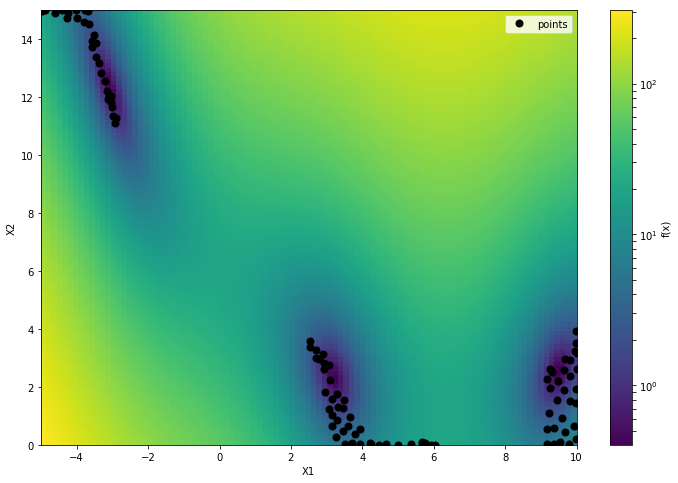

In [22]:
 plot_branin_with_points(np.array(a))

In [23]:
a = opt.models[-1]

In [24]:
opt.ask()

[9.95903798135016, 1.300048829231765]

In [25]:
opt.Xspace

array([[0.52998754, 0.91948124],
       [0.34465128, 0.39406818],
       [0.6140608 , 0.59906763],
       ...,
       [0.35449328, 0.37763593],
       [0.70670944, 0.67679629],
       [0.48789086, 0.05562485]])

In [26]:
opt.cand_acq_funcs_

['EI']